In [16]:
from math import *
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt

from pint import UnitRegistry, set_application_registry
ureg = UnitRegistry()
set_application_registry(ureg)

litros = ureg.litre
atmosferas = ureg.atmosphere
moles = ureg.mol
kelvins = ureg.kelvin
kilogramos = ureg.kilogram
gramos = ureg.gram
kilometros = ureg.kilometer
metros = ureg.meter
milimetros = ureg.millimeter
centimetros = ureg.centimeter
nanometros = ureg.nanometer
femtometros = ureg.femtometer
fermis = ureg.femtometer
julios = ureg.joule
kilojulios = ureg.kilojoule
pascales = ureg.pascal
newtons = ureg.newton
teslas = ureg.tesla
voltios = ureg.volt
kilovoltios = ureg.kilovolt
culombios = ureg.coulomb
amperios = ureg.ampere
faradios = ureg.farad
nanofaradios = ureg.nanofarad
segundos = ureg.second
nanosegundos = ureg.nanosecond
horas = ureg.hour
eV = ureg.electron_volt
MeV = ureg.megaelectron_volt
keV = ureg.kiloelectron_volt
Å = ureg.angstrom

c = ureg.speed_of_light

Q = ureg.Quantity

h = 6.628e-34 * julios * segundos 
ℏ = h / ( 2 * pi )

ℏc = 200 * eV * nanometros

atmosfera = 101327.38879319 * newtons / metros**2

µ0 = 4 * pi * 1e-7 * teslas * metros / amperios
𝜀0 = 1 / ( µ0 * c**2)
print(𝜀0.to(faradios / metros))

8.85418781762039e-12 farad / meter


In [29]:
d = [2*milimetros, 2.5*milimetros, 3*milimetros, 3.5*milimetros, 4*milimetros]
print(d)
V = [5.72*voltios, 4.13*voltios, 3.19*voltios, 2.33*voltios, 2.04*voltios]
print([_V.to(voltios) for _V in V])
C220 = 220*nanofaradios
print(C220)
V0 = 0.5*kilovoltios
print(V0)
S = 0.0531 * metros**2
print(S)

Q = [C220/(1/_V - 1/V0) for _V in V]
print([_Q.to(faradios * voltios) for _Q in Q])

[<Quantity(2, 'millimeter')>, <Quantity(2.5, 'millimeter')>, <Quantity(3, 'millimeter')>, <Quantity(3.5, 'millimeter')>, <Quantity(4, 'millimeter')>]
[<Quantity(5.72, 'volt')>, <Quantity(4.13, 'volt')>, <Quantity(3.19, 'volt')>, <Quantity(2.33, 'volt')>, <Quantity(2.04, 'volt')>]
220 nanofarad
0.5 kilovolt
0.0531 meter ** 2
[<Quantity(1.27296269e-06, 'farad * volt')>, <Quantity(9.16167544e-07, 'farad * volt')>, <Quantity(7.06306234e-07, 'farad * volt')>, <Quantity(5.149999e-07, 'farad * volt')>, <Quantity(4.50638606e-07, 'farad * volt')>]


[500.0, 400.0, 333.3333333333333, 285.7142857142857, 250.0]
slope=3.3581167896359884e-09, intercept=-4.159187070505141e-07, r_value=0.9980060006628951, p_value=0.00010685415931158678, std_err=1.2262045267972638e-10
1.2648274160587527e-10 farad / meter


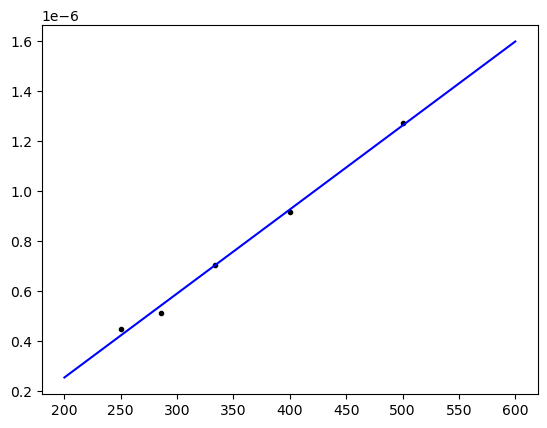

In [60]:
X = [1/_d.to(metros).magnitude for _d in d]
Y = [_Q.to(culombios).magnitude for _Q in Q]
print(X)

from scipy import stats
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print(f"slope={slope}, intercept={intercept}, r_value={r_value}, p_value={p_value}, std_err={std_err}")

f = plt.figure()
plt.plot(X, Y, 'k.')
n = np.array([ 200, 400, 600 ])
plt.plot(n, intercept + slope * n, 'b-')

e0 = (slope*metros*culombios/S/V0).to(faradios/metros)
print(e0)

In [64]:
print((e0/𝜀0).to_base_units())

14.285075515810346 dimensionless


In [72]:
std_err/slope*100

3.651464804862196

In [77]:
e0*(std_err/slope)

<Quantity(4.61847279e-12, 'farad / meter')>

In [84]:
(S*V0).to(voltios*metros**2)

<Quantity(26.55, 'volt * meter ** 2')>

In [87]:
std_err/26.55

4.6184727939633286e-12

In [92]:
d = 3.5 * milimetros
V0 = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]*voltios
print(V0)
Vf = [2.33, 6.05, 9.35, 10.66, 10.68, 10.7, 10.7, 10.71]*voltios
print(Vf)
C220 = 220*nanofaradios
Q = [C220/(1/_Vf - 1/_V0) for _V0, _Vf in zip(V0, Vf)]
print([_Q.to(faradios * voltios) for _Q in Q])

[ 500 1000 1500 2000 2500 3000 3500 4000] volt
[2.33 6.05 9.35 10.66 10.68 10.7 10.7 10.71] volt
[<Quantity(5.149999e-07, 'farad * volt')>, <Quantity(1.33910156e-06, 'farad * volt')>, <Quantity(2.06990239e-06, 'farad * volt')>, <Quantity(2.3577669e-06, 'farad * volt')>, <Quantity(2.35968056e-06, 'farad * volt')>, <Quantity(2.36242599e-06, 'farad * volt')>, <Quantity(2.36121858e-06, 'farad * volt')>, <Quantity(2.36252566e-06, 'farad * volt')>]


[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
slope=1.5549024920423273e-09, intercept=-2.4690120685200127e-07, r_value=0.9994004535835536, p_value=0.02204592000647913, std_err=5.38672638333382e-11
1.0248886482388221e-10 farad / meter


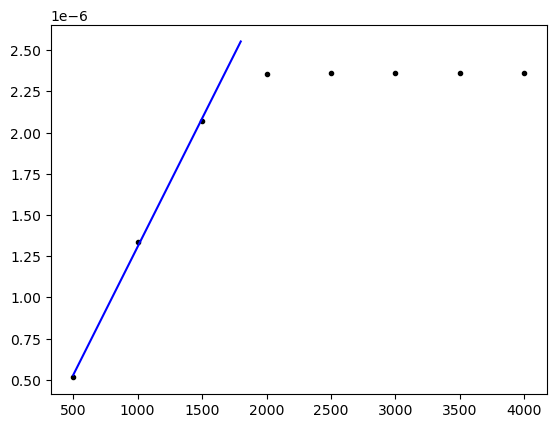

In [112]:
X = [_V0.to(voltios).magnitude for _V0 in V0]
Y = [_Q.to(culombios).magnitude for _Q in Q]
print(X)

from scipy import stats
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

slope, intercept, r_value, p_value, std_err = stats.linregress(X[0:3], Y[0:3])
print(f"slope={slope}, intercept={intercept}, r_value={r_value}, p_value={p_value}, std_err={std_err}")

f = plt.figure()
plt.plot(X, Y, 'k.')
n = np.array([ 500, 1000, 1500, 1800 ])
plt.plot(n, intercept + slope * n, 'b-')

e0 = (slope*culombios/voltios*d/S).to(faradios/metros)
print(e0)

In [114]:
(d/S).to(1/metros)

<Quantity(0.065913371, '1 / meter')>

In [115]:
std_err*0.06591337099811677

3.550572945700258e-12